# Investigating Fandango Movie Ratings - Are They Still Biased? 
## Introduction

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (<a href='https://www.fandango.com/'>Fandango</a> is an online movie ratings aggregator). He published his analysis in this <a href='https://fivethirtyeight.com/features/fandango-movies-ratings/'>article</a>.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's __a significant discrepancy between the number of stars displayed to users and the actual rating__, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded __up__ to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

__Fandango's officials__ replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they __promised to fix the bug as soon as possible__. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

__The goal of this project__ is as follows:
- analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Data Exploration
One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

Walt Hickey made the data he analyzed publicly available on <a href='https://github.com/fivethirtyeight/data/tree/master/fandango'>GitHub</a>. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on <a href='https://github.com/mircealex/Movie_ratings_2016_17'>GitHub</a> and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

rating_before = pd.read_csv("/Users/ruslankononov/Study/Programming/Python/data_quest/Projects:Datasets/Investigating Fandango Movie Ratings/Datasets/fandango_score_comparison.csv")
rating_after = pd.read_csv("/Users/ruslankononov/Study/Programming/Python/data_quest/Projects:Datasets/Investigating Fandango Movie Ratings/Datasets/movie_ratings_16_17.csv")

# avoid truncated output
pd.set_option('display.max_columns', None) 

In [2]:
rating_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [3]:
rating_before.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,2.50,3.40,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,2.65,3.80,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,4.05,3.40,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,4.05,4.40,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,4.00,4.25,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [4]:
# copy all the relevant data to a new dataframe
rates_before = rating_before[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_Difference']].copy()

rates_before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,0.5
1,Cinderella (2015),5.0,4.5,0.5
2,Ant-Man (2015),5.0,4.5,0.5
3,Do You Believe? (2015),5.0,4.5,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,0.5


In [5]:
rating_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
rating_after.head(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


In [7]:
# copy all the relevant data to a new dataframe
rates_after = rating_after[['movie','year','fandango','nr_metascore','nr_imdb']].copy()

rates_after.head(5)

,movie,year,fandango,nr_metascore,nr_imdb
0,10 Cloverfield Lane,2016,3.5,4.0,3.5
1,13 Hours,2016,4.5,2.5,3.5
2,A Cure for Wellness,2016,3.0,2.5,3.5
3,A Dog's Purpose,2017,4.5,2.0,2.5
4,A Hologram for the King,2016,3.0,3.0,3.0


In [8]:
# check variability of years in the first dataset 
pattern = r'\((201[0-9])\)'
rates_before['year'] = rates_before['FILM'].str.extract(pattern).astype(np.int64)

rates_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [9]:
# check variability of years in the second dataset 
rates_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. Therefore, the population of interest for our analysis should include all the movie ratings stored on Fandango's website, regardless of the releasing year.

As we want to find out whether the parameters of this population changed after Hickey's analysis, we are interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we are working with was sampled at the moments of our interest: one sample was taken previous to the analysis, and the other after the analysis. However, we need to make sure that the samples are representative, otherwise we may get a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the <a href='https://github.com/fivethirtyeight/data/tree/master/fandango'>data set's repository</a>, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we are interested to describe. It seems more likely that it is not, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the <a href='https://github.com/fivethirtyeight/data/tree/master/fandango'>data set's repository</a>):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it is unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## Changing the Initial Goal of our Analysis

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

In our analysis we will use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

However, the _rates_after_ dataframe does not have data on the number of fan reviews. We could have solved that problem by selecting a random sample of 10 movies and checking the corresponding number of fun rating manually on the Fandango's website. 

However, this is no longer possible, as the Fandago's fan ratings have been recently replaced with the Rotten Tomatoes Audience Score. Nevertheless, bearing in mind the above-mentioned limitations, we will assume that the movies from the second dataset are all popular.

## Data Cleaning

As we have noticed earlier, some movies were not released in 2015 and 2016. Thus, we need to isolate only the sample points that belong to our populations of interest.

In [10]:
# isolate the movies released in 2015 in a separate data set
rating_2015 = rates_before[rates_before.year==2015].copy()

# isolate the movies released in 2016 in a separate data set
rating_2016 = rates_after[rates_after.year==2016].copy()

In [11]:
rating_2015.year.value_counts()

2015    129
Name: year, dtype: int64

In [12]:
rating_2016.year.value_counts()

2016    191
Name: year, dtype: int64

## Data Analysis

Our goal is to figure out whether there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We will start with comparing the shape of the two distributions using kernel density plots. We'll use the <a href='https://www.dataquest.io/blog/making-538-plots/'>FiveThirtyEight</a> style for the plots.

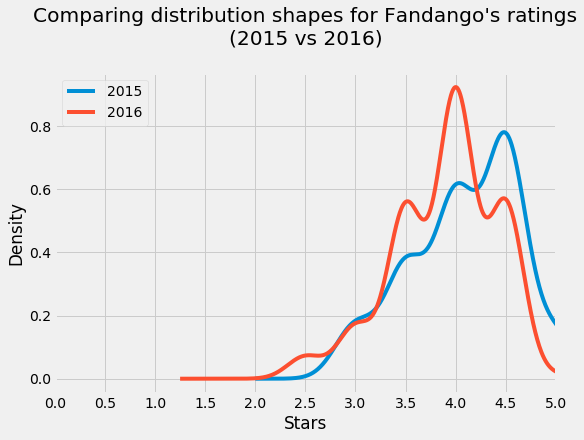

In [13]:
plt.style.use('fivethirtyeight')
from numpy import arange

#draw kernel density plots
rating_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
rating_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))

plt.show()

Two aspects are striking on the figure above:

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

However, if we compare the distribution of the Fandango's ratings to those from IMDb and Metacritic in 2016, we can clearly see that the Fandango's ratings are on average higher.

In [ ]:
rating_2016['fandango'].plot.kde(label = 'Fandango', legend = True, figsize = (8,5.5))
rating_2016['nr_metascore'].plot.kde(label = 'Metacritic', legend = True)
rating_2016['nr_imdb'].plot.kde(label = 'IMDb', legend = True)

plt.title("Comparing distribution shapes for movie ratings from \n Fandango, Metacritic and IMDb",y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))

plt.show()

### Comparing Relative Frequencies
To get more accurate information on differences in ratings over two years, let's examine the frequency distribution of the Fandango's ratings in 2015 and 2016 respectively.

In [ ]:
print("2015")
rating_2015['Fandango_Stars'].value_counts(normalize=True).iloc[[3,2,1,0,4]]* 100

In [ ]:
print("2016")
rating_2016['fandango'].value_counts(normalize=True).iloc[[4,3,2,0,1,5]]* 100

In [ ]:
rating_2015['Fandango_Stars'].value_counts().plot.pie(figsize = (6,6),autopct = '%.1f%%',label='2015')

In [ ]:
rating_2016['fandango'].value_counts().plot.pie(figsize = (6,6),autopct = '%.1f%%',label='2016')

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. Therefore, two frequency distributions are clearlz different.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

However, one should bear in mind that we compare ratings for different movies. From year to year the number of outstanding works that are created by prominent directors and backed by lavish funding can vary greatly. Therefore, variability of ratings will change annually too.

### Determining the Direction of the Change
To get a more precise picture about the direction of the change, we will compute the following metrics: 
- mean
- median 
- mode 

Then we will put our values on the bar graph to visualize possible differences between them.

In [ ]:
# calculate mean, median and mode values for ratings in 2015 and save them to a list 
metrics_2015 = [rating_2015['Fandango_Stars'].mean(),rating_2015['Fandango_Stars'].median(),
                                                     rating_2015['Fandango_Stars'].mode()]

# calculate mean, median and mode values for ratings in 2016 and save them to a list 
metrics_2016 = [rating_2016['fandango'].mean(),rating_2016['fandango'].median(),
                                                     rating_2016['fandango'].mode()]

In [ ]:
# draw a graph
fig,ax = plt.subplots(figsize=(10,6))
plt1 = ax.bar(arange(3)+1,metrics_2015,0.5)
ax.set_xticks(arange(3)+1.1)
ax.set_yticks(arange(0,5.5,step=0.5))
ax.set_xticklabels(['mean','median','mode'])
plt.ylim(0,5.5)
plt.ylabel('stars')

plt2 = ax.bar(arange(3)+1.2,metrics_2016,0.5)

ax.legend(handles=[plt1,plt2],labels=['2015','2015'],loc='upper center',frameon=False)
plt.title('Comparing summary statistics: 2015 vs 2016',y = 1.07)

plt.show()

As we see, the mean value for the fan rating in 2016 slightly fell. The decrease accounts only to 5%. 

In [ ]:
(metrics_2015[0] / metrics_2016[0] - 1)*100